# Reconhecimento de Dígitos Manuscritos

#### Importações

In [1]:
# Para leitura do conjunto de dados MNIST
from sklearn.datasets import fetch_openml
import pandas as pd

# Para pré-processamento de dados
from sklearn.preprocessing import StandardScaler

# Para treinamento de dados
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Para avaliar resultados
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Para visualizar graficamente
import seaborn as sns
import matplotlib.pyplot as plt

# Para escolher figuras aleatóriamente
import numpy as np

#### Funções

In [2]:
# Função apenas para auxiliar na visualização das informações
def print_separator():
    print('\n\n'+ '#'*40 +'\n\n')

In [3]:
# Função para plotar as imagens
def plot_images_with_predictions(images, predictions, labels, num_images=5):
    plt.figure(figsize=(25,3)) # Tamanho da figura
    for i in range(num_images):
        plt.subplot(1, num_images, i+1) # Posição da imagem
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        plt.title(f'Previsto: {str(predictions[i])}, Real: {labels.iloc[i]}') # predictions é um array do numpy, labels é uma Series do pandas
        plt.axis('off') # Retira os valores dos eixos
    plt.show()

#### Carregar conjunto de dados MNIST

In [4]:
# Este conjunto de dados possui imagens de dígitos 28x28
# Carregamos a versão 1 pois é a mais comum utilizada
# as_frame=True para carregar como um DataFrame do pandas
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [5]:
# Atribuindo as informações ao DataFrame do pandas
df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
df['target'] = mnist.target

In [6]:
# Obter informações do DataFrame
print(df.head())
print_separator()
print(df.info())
print_separator()
print(df.dtypes)

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  target  
0       0.0       0.

#### Preparar conjunto de dados para treinamento

In [7]:
# Separar variáveis do DataFrame
X = df.drop('target', axis=1) # Atributos são todas as colunas, exceto a coluna "target"
y = df['target'] # Classe é a coluna "target", a qual indica qual número realmente está na imagem

In [8]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Separar dados para treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Treinar modelo K-Nearest Neighbors
# Modelo simples e eficaz para problemas de reconhecimento padrões
knn = KNeighborsClassifier(n_neighbors=5) # Considera 5 vizinhos para tomar decisão (colocar número ímpar para não empatar na votação de classes)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Prever resposta
y_pred = knn.predict(X_test)

#### Avaliar o modelo

In [12]:
# Obter resultados
# Matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
# Relatório de classificação
classification_rep = classification_report(y_test, y_pred)

Acurácia: 94.6%


########################################


Relatório de Classificação
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.89      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



########################################




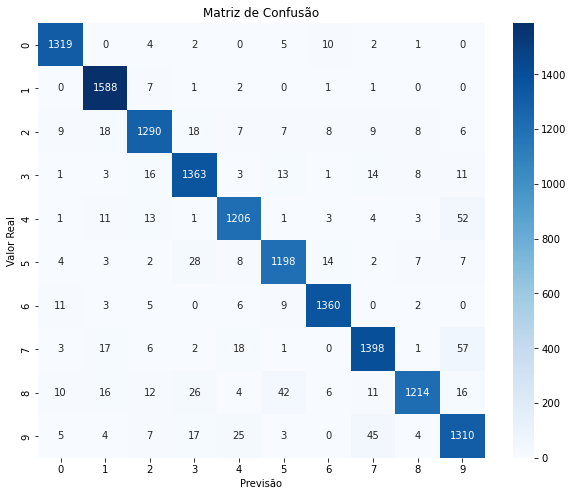

In [13]:
# Printar valores dos resultados
print(f'Acurácia: {accuracy*100:.1f}%')
print_separator()

print('Relatório de Classificação')
print(classification_rep)
print_separator()

# Plotar gráfico da matriz de confusão
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

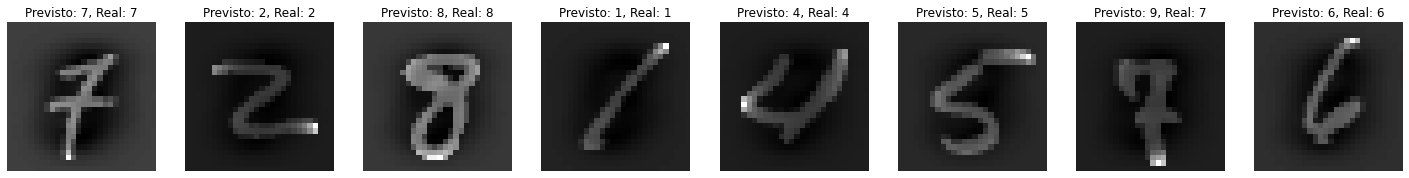

In [14]:
# Avaliar visualmente as previsões diante 
num_images = 8
sample_indices = np.random.choice(range(len(y_test)), num_images, replace=False) # Sorteio dos índices
# Pegar amostras dos pixeis, valores da previsão e valores reais de cada índice sorteado
sample_images = X_test[sample_indices]
sample_predictions = y_pred[sample_indices]
sample_labels = y_test.iloc[sample_indices]
# Plotar gráfico através da função criada neste projeto
plot_images_with_predictions(sample_images, sample_predictions, sample_labels, num_images)